In [4]:
import torch
import matplotlib.pylab as plt
import numpy as np

from IPython.display import Audio
from pyannote.core import Segment
from scipy.spatial.distance import cdist
from scipy.io import wavfile

In [2]:
def plot_audio_signal(filepath: str):
    sr, audio = wavfile.read(filepath)

    time = np.linspace(0, len(audio) / sr, num=len(audio))

    _ = plt.figure(figsize=(16, 3))
    _ = plt.title("Audio Signal")
    _ = plt.xlabel("Time (s)")
    _ = plt.ylabel("Amplitude")
    _ = plt.plot(time, audio)

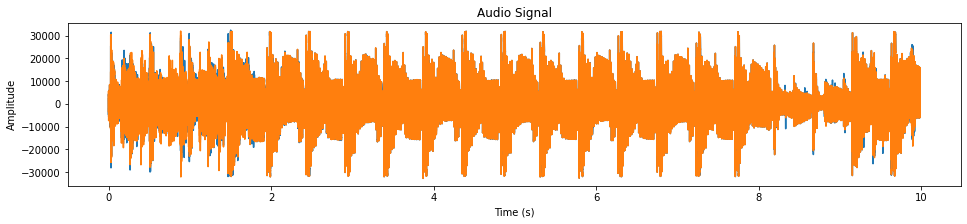

In [6]:
boris_brejcha = "sample-redemption.wav"
plot_audio_signal(boris_brejcha)
Audio(filename=boris_brejcha)

In [8]:
embedding_model = torch.hub.load('pyannote/pyannote-audio', 'emb')
print(f'Embedding has dimension {embedding_model.dimension:d}.')

Using cache found in /home/gabrielziegler/.cache/torch/hub/pyannote_pyannote-audio_master


Embedding has dimension 512.


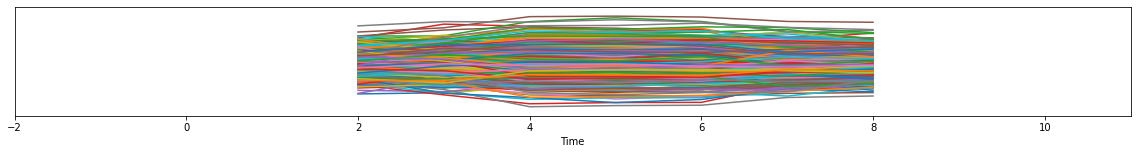

In [18]:
boris_brejcha_emb = embedding_model({"audio": boris_brejcha})
boris_brejcha_emb

In [14]:
boris_brejcha_emb.data.size

3584

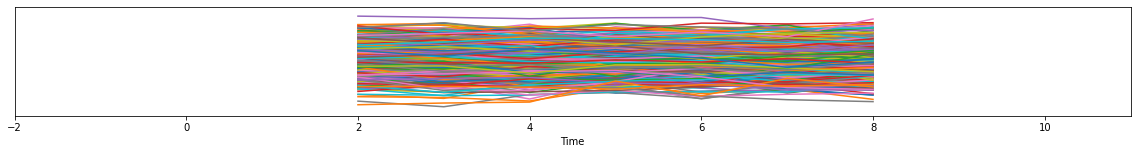

In [22]:
let_there = embedding_model({"audio": "./data/"})
let_there

In [23]:
import os

song_embeddings = {}

for song in os.listdir("data/"):
    if not song.endswith(".wav"):
        continue
    
    song_embeddings[song] = embedding_model({"audio": os.path.join("data", song)})
    
song_embeddings

{'sample_redemption.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f49411479d0>,
 'redemption.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f49406154c0>,
 'sample_1_battery.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941911b20>,
 'sample_4_welcome_home_sanitarium.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941911d60>,
 'sample_5_disposable_heroes.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941911f70>,
 'sample_6_leper_messiah.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941a3d340>,
 'sample_7_orion.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941a3d670>,
 'sample_8_damage,_inc.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941a3dbb0>,
 'sample_artbat_who_made_who.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941a3d370>,
 'sample_let_there_be_dark.wav': <pyannote.core.feature.SlidingWindowFeature at 0x7f4941a3dc40>,
 'sample_3_the_thing_that_should_not_be.wav': <pyannote.core.fe

In [67]:
# song_embeddings.values().data

In [123]:
import pandas as pd

df = pd.DataFrame()
df["song"] = song_embeddings.keys()
df["embedding"] = list([i.data for i in song_embeddings.values()])
df["embedding"] = df["embedding"].apply(lambda x: np.mean(x, axis=0))
df["band"] = np.NaN
df.head()

,song,embedding,band
0,sample_redemption.wav,"[-0.2834755, 0.23235925, 0.08380648, -0.047556...",NaN
1,redemption.wav,"[-0.26551738, 0.052782334, -0.052663688, 0.000...",NaN
2,sample_1_battery.wav,"[-0.1561536, -0.216894, -0.1001103, -0.0500634...",NaN
3,sample_4_welcome_home_sanitarium.wav,"[-0.13709192, -0.17952451, -0.13676901, -0.097...",NaN
4,sample_5_disposable_heroes.wav,"[-0.37590194, -0.2975566, -0.14488544, 0.03320...",NaN


In [129]:
metallica_songs = [
    'sample_1_battery.wav',
    'sample_4_welcome_home_sanitarium.wav',
    'sample_5_disposable_heroes.wav',
    'sample_6_leper_messiah.wav',
    'sample_7_orion.wav',
    'sample_8_damage,_inc.wav',
    'sample_3_the_thing_that_should_not_be.wav',
    'sample_2_master_of_puppets.wav'
]

df.loc[df["song"].isin(metallica_songs), "band"] = 1
df.loc[~df["song"].isin(metallica_songs), "band"] = 0
df

,song,embedding,band
0,sample_redemption.wav,"[-0.2834755, 0.23235925, 0.08380648, -0.047556...",0
1,redemption.wav,"[-0.26551738, 0.052782334, -0.052663688, 0.000...",0
2,sample_1_battery.wav,"[-0.1561536, -0.216894, -0.1001103, -0.0500634...",1
3,sample_4_welcome_home_sanitarium.wav,"[-0.13709192, -0.17952451, -0.13676901, -0.097...",1
4,sample_5_disposable_heroes.wav,"[-0.37590194, -0.2975566, -0.14488544, 0.03320...",1
5,sample_6_leper_messiah.wav,"[-0.19164123, -0.21253233, -0.06763164, -0.036...",1
6,sample_7_orion.wav,"[-0.19713946, -0.11842632, -0.14374354, -0.007...",1
7,"sample_8_damage,_inc.wav","[-0.08223266, -0.06297802, -0.21431182, -0.087...",1
8,sample_artbat_who_made_who.wav,"[-0.17843145, -0.14065664, 0.024658125, -0.129...",0
9,sample_let_there_be_dark.wav,"[-0.106160365, 0.031853408, 0.1398088, -0.0195...",0


In [134]:
X = [i for i in df["embedding"]]
X

[array([-2.83475488e-01,  2.32359245e-01,  8.38064775e-02, -4.75562848e-02,
        -3.03139210e-01, -6.41429275e-02,  6.68680295e-02, -1.98374659e-01,
         9.73346606e-02,  2.11975406e-04,  2.71233618e-01,  1.50146708e-01,
         6.70493320e-02,  4.03759986e-01, -8.13063309e-02, -1.20690905e-01,
        -1.25391260e-01, -1.03798948e-01,  1.40582666e-01, -9.82177779e-02,
         7.97848701e-02, -2.39902809e-01, -1.91444114e-01, -1.01745287e-02,
        -9.34792589e-03,  4.56935652e-02, -4.05112095e-02, -1.62785426e-01,
        -4.46684696e-02, -1.30937845e-01,  2.55842537e-01,  1.27035245e-01,
        -4.48534973e-02, -1.91086292e-01,  7.37544671e-02, -6.78316280e-02,
        -1.05337277e-01,  5.65729709e-03,  4.50477339e-02, -1.33432001e-01,
        -1.17500394e-03, -1.13814451e-01,  2.62833029e-01,  8.26734453e-02,
        -1.77481025e-01,  2.86730707e-01, -1.14703521e-01, -3.59964892e-02,
         1.11950703e-01,  2.50482738e-01, -1.33528247e-01, -2.05860183e-01,
         1.6

In [136]:
# X = np.array(df["embedding"])
y = df["song"]
# X = np.vstack(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', metric="cosine")
X_2d = tsne.fit_transform(X)

/home/gabrielziegler/PyEnv/DeepLearning/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


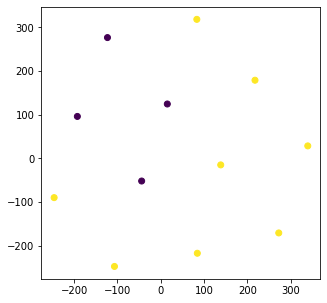

In [137]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
plt.scatter(*X_2d.T, c=df.band)

In [20]:
# compare speaker embedding
from scipy.spatial.distance import cdist

distance = cdist(np.mean(boris_brejcha_emb, axis=0, keepdims=True), 
                 np.mean(let_there, axis=0, keepdims=True), 
                 metric='cosine')[0, 0]
distance

0.7514620798556748